<a href="https://colab.research.google.com/github/vnaudoori28/LogicMojo_AIML_Practice/blob/main/Probability_Distribution_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Distribution - 2

**Agenda**

**Advanced Topics**
1. Central Limit Theorem
2. Relationship Between Distributions
3. Sampling Distributions
4. Student's t-Distribution
5. F-Distribution
6. Bayesian Statistics
7. Lognormal Distribution
8. Pareto Distribution

### Central Limit Theorm (CLT)

* The Central Limit Theorem (CLT) is one of the most powerful and fundamental concepts in statistics and probability theory. It states that when you take the mean of a sufficiently large number of independent and identically distributed (i.i.d.) random variables, regardless of the original distribution of the variables, the distribution of the sample mean will approach a normal (Gaussian) distribution. This result holds true even if the original variables themselves are not normally distributed.

* Key Points of CLT:
   * Sample Mean Distribution: The distribution of the sample means will tend to be normal (Gaussian), even if the original data is not normally distributed.

   * Sample Size: The larger the sample size, the closer the sample means will be to a normal distribution. Typically, a sample size of 30 or more is considered sufficient, although this can vary depending on the underlying population distribution.

   * Population Mean and Variance: The mean of the sampling distribution of the sample mean is equal to the population mean. The variance of this distribution is equal to the population variance divided by the sample size.

   * Applications: CLT is crucial in hypothesis testing, confidence intervals, and various other statistical methods.


* Mathematical Formulation:
   * Let
X
1
​
 ,X
2
​
 ,…,Xn
  be a sequence of i.i.d. random variables with mean
μ and variance
σ
2
 . The sample mean
X
ˉ
  is given by:

    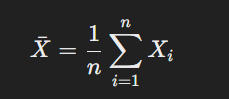
     * The CLT states that as
n becomes large, the distribution of
X
ˉ
  approaches a normal distribution with mean
μ and variance
𝜎
2
𝑛:

   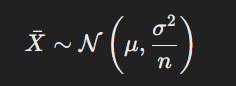

   * As a result, the standardized form of the sample mean:

   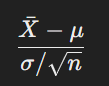

   approaches a standard normal distribution
N(0,1) as
n increases.

* **Importance in Machine Learning:**
    * The CLT justifies the use of normal distribution in many statistical methods used in Machine Learning (ML). For instance, it underpins the assumption that errors (or noise) in regression models are normally distributed, which is critical for making inferences about model parameters. The CLT also facilitates the use of normal distribution as an approximation in algorithms and simplifies the analysis of complex systems.

* Demonstrating CLT in Python

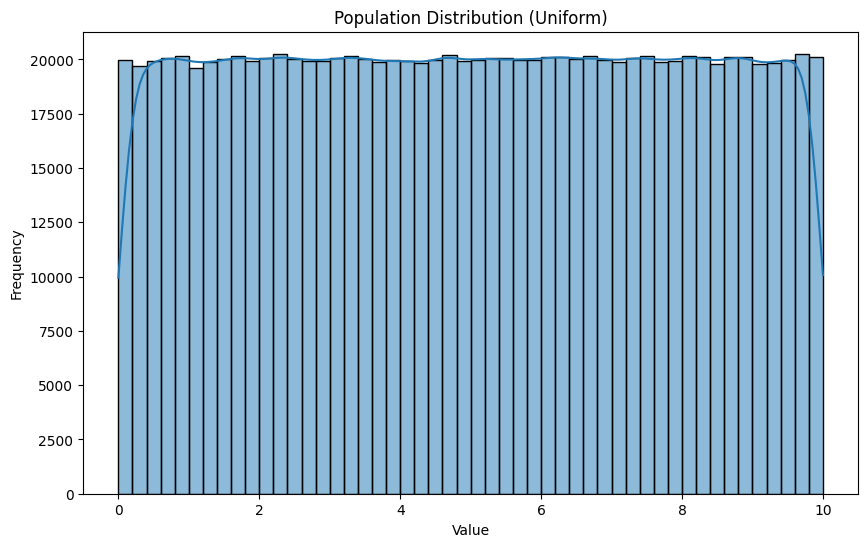

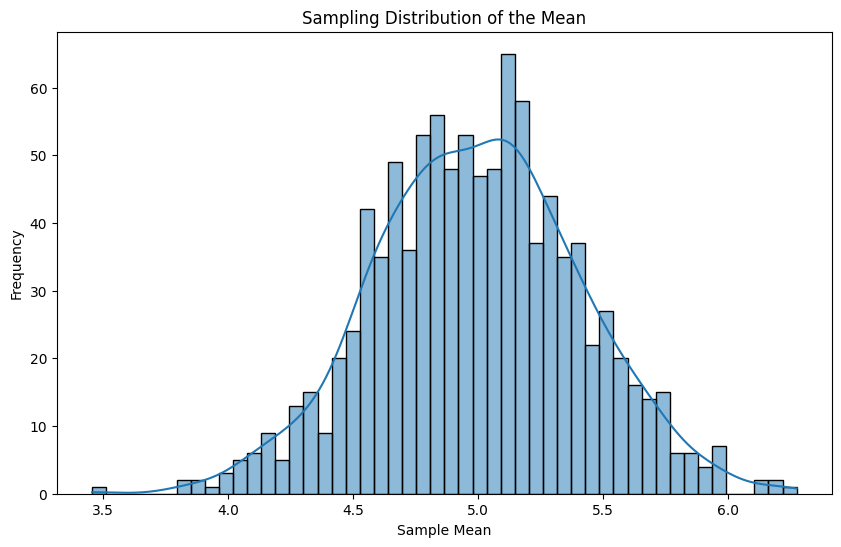

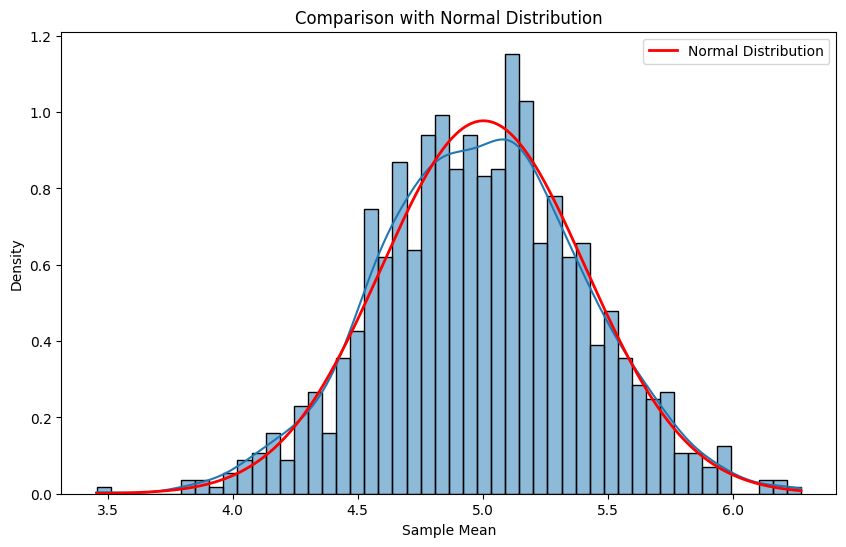

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Population parameters
population_size = 1000000  # Large population
population = np.random.uniform(0, 10, population_size)  # Uniform distribution

# Visualize the population distribution
plt.figure(figsize=(10, 6))
sns.histplot(population, bins=50, kde=True)
plt.title('Population Distribution (Uniform)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Parameters for sampling
sample_size = 50  # Number of data points in each sample
num_samples = 1000  # Number of samples to draw

# Draw multiple samples and compute the mean of each sample
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, sample_size)
    sample_means.append(np.mean(sample))

# Visualize the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=50, kde=True)
plt.title('Sampling Distribution of the Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# Compare with a normal distribution
mu = np.mean(population)
sigma = np.std(population) / np.sqrt(sample_size)
x = np.linspace(min(sample_means), max(sample_means), 1000)
normal_dist = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=50, kde=True, stat='density')
plt.plot(x, normal_dist, 'r-', lw=2, label='Normal Distribution')
plt.title('Comparison with Normal Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### Relationship Between Distributions

#### Binomial and Poisson Distribution:



* Binomial Distribution: The binomial distribution models the number of successes in a fixed number of independent Bernoulli trials (each with two possible outcomes: success or failure) with a constant probability of success p. It is characterized by the parameters
n (number of trials) and p (probability of success).

* Poisson Distribution: The Poisson distribution models the number of events occurring in a fixed interval of time or space, given the average number of events (λ) that occur in that interval. It is often used to model rare events.

* Relationship: As
n (number of trials) increases and
p (probability of success) decreases while keeping the product
n⋅p=λ constant, the binomial distribution approaches the Poisson distribution. This is particularly useful in scenarios where the event is rare (small
p) and the number of trials is large (large
n), such as modeling the number of accidents in a city over a year.

* Example: Let's compare the Binomial and Poisson distributions. We will simulate and plot both distributions for a given
n and
p, and compare them with the Poisson distribution where
λ=np.

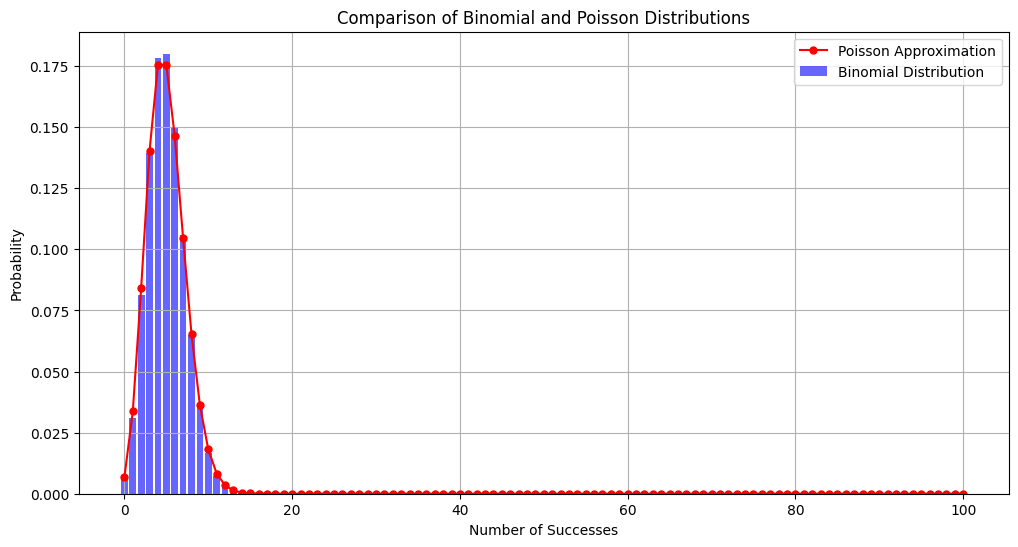

Mean of the Poisson distribution (lambda): 5.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Parameters for the Binomial and Poisson distributions
n = 100        # Number of trials
p = 0.05       # Probability of success in each trial
lambda_ = n * p  # Mean for the Poisson distribution

# Define the range of values (0 to n) for the plots
x = np.arange(0, n + 1)

# Compute the Binomial PMF
binomial_pmf = binom.pmf(x, n, p)

# Compute the Poisson PMF
poisson_pmf = poisson.pmf(x, lambda_)

# Plot the Binomial PMF
plt.figure(figsize=(12, 6))
plt.bar(x, binomial_pmf, color='b', alpha=0.6, label='Binomial Distribution')

# Plot the Poisson PMF
plt.plot(x, poisson_pmf, 'ro-', label='Poisson Approximation', markersize=5)

# Add titles and labels
plt.title('Comparison of Binomial and Poisson Distributions')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# Print the mean of the distributions
print(f"Mean of the Poisson distribution (lambda): {lambda_:.2f}")

#### Normal and Exponential Distribution

* Exponential Distribution: The exponential distribution models the time between events in a Poisson process, where events occur continuously and independently at a constant average rate. It is characterized by the rate parameter
λ.

* Gamma Distribution: The gamma distribution generalizes the exponential distribution by modeling the sum of
k independent exponential random variables, where
k is a positive integer. When
k=1, the gamma distribution reduces to the exponential distribution.

* Relationship to Normal Distribution: The Central Limit Theorem implies that the sum of a large number of independent and identically distributed random variables (even if they are not normally distributed) will approximate a normal distribution. In particular, the sum of independent exponential random variables (which follows a gamma distribution) will approach a normal distribution as the number of variables increases. This connection is foundational in understanding how different distributions relate to each other and why normal distribution is so prevalent in statistics.

* Example: Let's simulate data from both distributions and visualize their relationship.

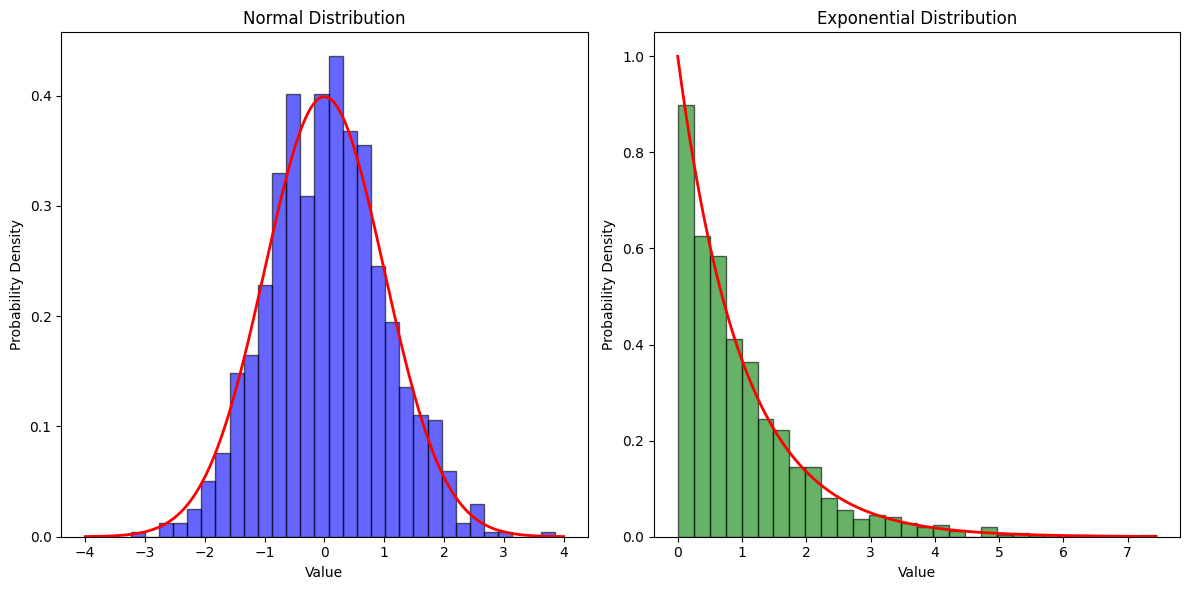

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

# Parameters for the distributions
mean_normal = 0
std_dev_normal = 1
rate_exponential = 1  # lambda for exponential distribution

# Generate random samples
num_samples = 1000
samples_normal = np.random.normal(mean_normal, std_dev_normal, num_samples)
samples_exponential = np.random.exponential(1 / rate_exponential, num_samples)

# Plot histograms and PDF for the Normal distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_normal, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
x_normal = np.linspace(mean_normal - 4*std_dev_normal, mean_normal + 4*std_dev_normal, 1000)
pdf_normal = norm.pdf(x_normal, mean_normal, std_dev_normal)
plt.plot(x_normal, pdf_normal, 'r-', lw=2)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Plot histograms and PDF for the Exponential distribution
plt.subplot(1, 2, 2)
plt.hist(samples_exponential, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
x_exponential = np.linspace(0, max(samples_exponential), 1000)
pdf_exponential = expon.pdf(x_exponential, scale=1 / rate_exponential)
plt.plot(x_exponential, pdf_exponential, 'r-', lw=2)
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Display the plots
plt.tight_layout()
plt.show()

### Sampling Distributions

* Sampling Distribution refers to the probability distribution of a given statistic based on a random sample. The most common type of sampling distribution is the distribution of the sample mean, but it can also apply to other statistics like the sample median, variance, or proportion.

* Key Concepts:
   * Statistic: A statistic is a quantity computed from the sample data. Examples include the sample mean, sample variance, and sample proportion.

   * Sampling Distribution of the Mean: If you repeatedly draw random samples from a population and compute the mean of each sample, the distribution of those means forms the sampling distribution of the mean.

   * Central Limit Theorem (CLT): According to the CLT, the sampling distribution of the sample mean will be approximately normally distributed, provided the sample size is sufficiently large, regardless of the population's original distribution.

   * Standard Error: The standard deviation of the sampling distribution is called the standard error. It is calculated as:

   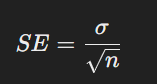

  * Importance of Sampling Distribution:

       * Hypothesis Testing: Helps determine how unusual or likely a sample statistic is under a given null hypothesis.
       * Confidence Intervals: Provides a range of plausible values for the population parameter based on the sample statistic.   

* Demonstrating Sampling Distribution in Python
  * Let's create a Python example to demonstrate the concept of a sampling distribution using a non-normal population distribution.

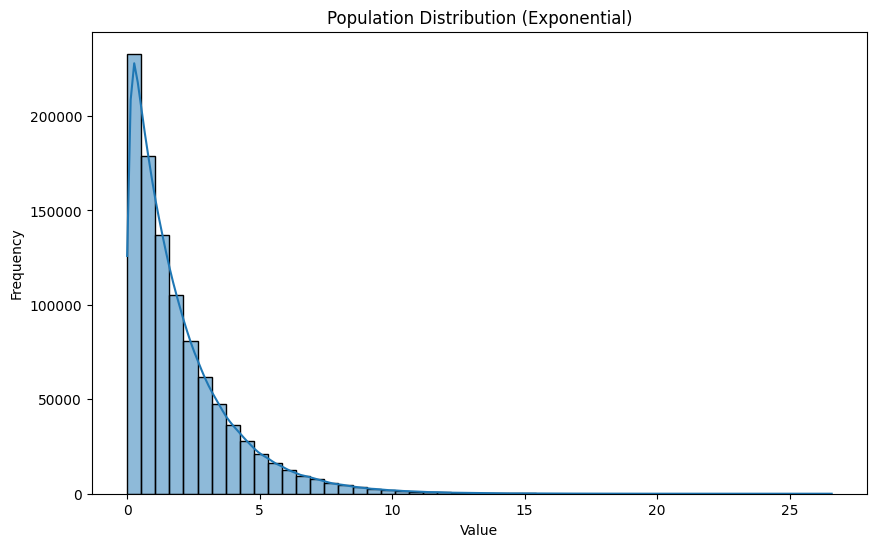

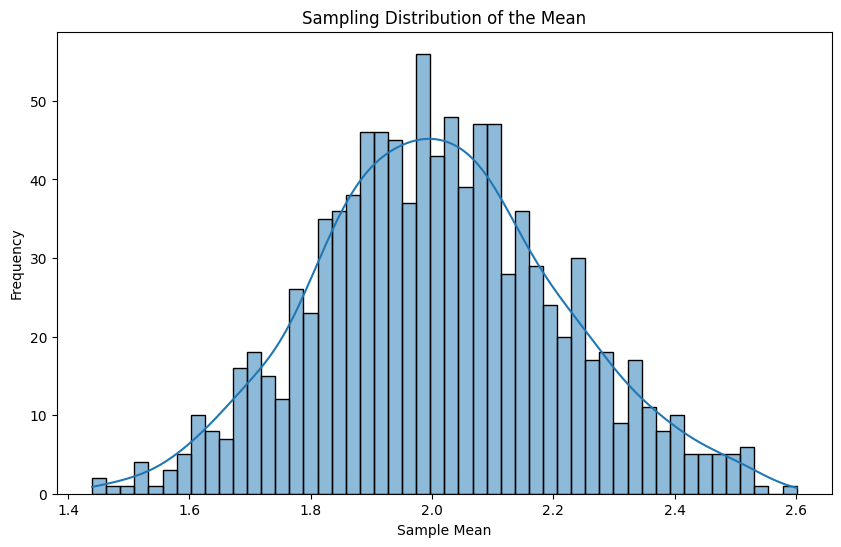

Mean of Sampling Distribution: 2.01
Standard Deviation of Sampling Distribution (Standard Error): 0.20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Population parameters
population_size = 1000000  # Large population
population = np.random.exponential(scale=2, size=population_size)  # Exponential distribution

# Visualize the population distribution
plt.figure(figsize=(10, 6))
sns.histplot(population, bins=50, kde=True)
plt.title('Population Distribution (Exponential)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Parameters for sampling
sample_size = 100  # Number of data points in each sample
num_samples = 1000  # Number of samples to draw

# Draw multiple samples and compute the mean of each sample
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, sample_size)
    sample_means.append(np.mean(sample))

# Visualize the sampling distribution of the mean
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=50, kde=True)
plt.title('Sampling Distribution of the Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and standard deviation of the sampling distribution
mean_of_sample_means = np.mean(sample_means)
std_dev_of_sample_means = np.std(sample_means)

print(f'Mean of Sampling Distribution: {mean_of_sample_means:.2f}')
print(f'Standard Deviation of Sampling Distribution (Standard Error): {std_dev_of_sample_means:.2f}')

### Student's t-Distribution

* Student's t-Distribution is a probability distribution used when estimating the mean of a normally distributed population when the sample size is small, and the population's standard deviation is unknown. It is often used in small sample scenarios where the Central Limit Theorem does not apply, and the sample variance is used as an estimate of the population variance.

* Key Concepts:
   * Shape of t-Distribution: The t-distribution is similar in shape to the normal distribution but has heavier tails. This means there is more probability in the tails, which accounts for the extra uncertainty in small samples.
As the sample size increases, the t-distribution approaches the normal distribution.
   * Degrees of Freedom (df): The shape of the t-distribution is determined by the degrees of freedom, which is typically
df=n−1 for a single sample.
A higher degrees of freedom (i.e., larger sample size) leads to a distribution closer to the normal distribution.
Applications:

   * Confidence Intervals: Used to estimate the population mean when the sample size is small.
Hypothesis Testing: Particularly in t-tests (e.g., one-sample t-test, two-sample t-test) for comparing means.

* Mathematical Formulation:
The probability density function (PDF) of the t-distribution with
ν degrees of freedom is given by:

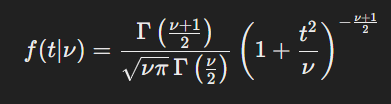

Where:

   * Γ is the gamma function.
   * ν is the degrees of freedom.
   * t is the t-score.

* Demonstrating Student's t-Distribution in Python
   * Let's create a Python example to demonstrate the Student's t-distribution, comparing it with the normal distribution.

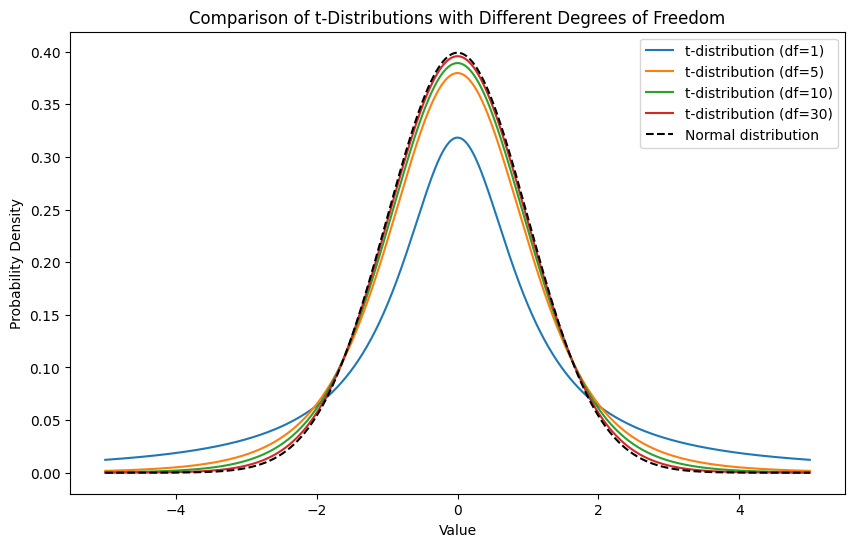

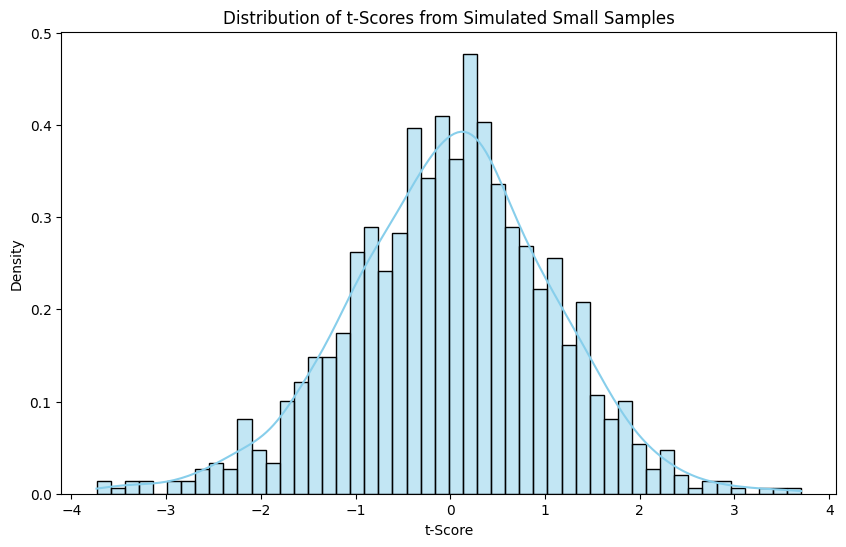

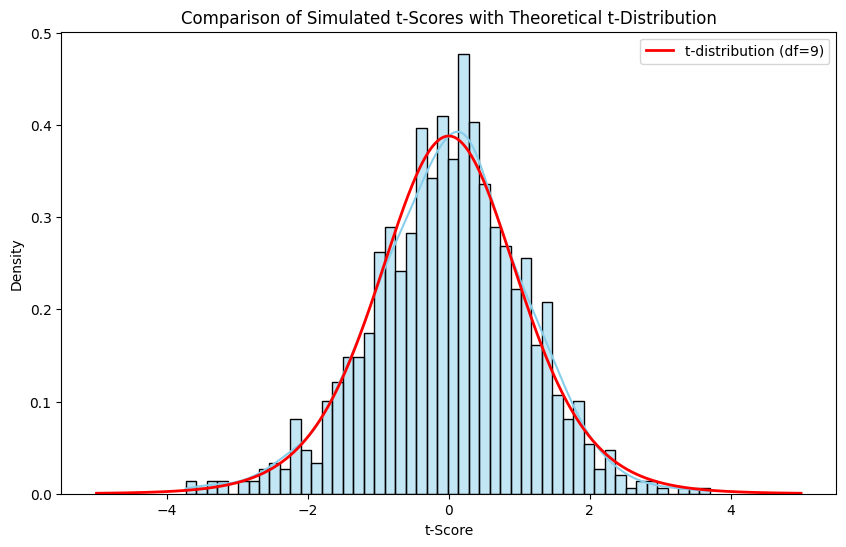

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the random seed for reproducibility
np.random.seed(42)

# Define the degrees of freedom
df_values = [1, 5, 10, 30]
x = np.linspace(-5, 5, 1000)

# Plot the t-distribution for different degrees of freedom
plt.figure(figsize=(10, 6))

for df in df_values:
    t_dist = stats.t(df)
    plt.plot(x, t_dist.pdf(x), label=f't-distribution (df={df})')

# Plot the standard normal distribution for comparison
normal_dist = stats.norm()
plt.plot(x, normal_dist.pdf(x), 'k--', label='Normal distribution')

plt.title('Comparison of t-Distributions with Different Degrees of Freedom')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Simulate a scenario with a small sample size
sample_size = 10
population_mean = 5
population_std = 2
num_samples = 1000

# Generate a small sample from a normal distribution
samples = np.random.normal(loc=population_mean, scale=population_std, size=(num_samples, sample_size))

# Compute the sample means and t-scores
sample_means = np.mean(samples, axis=1)
sample_stds = np.std(samples, axis=1, ddof=1)
t_scores = (sample_means - population_mean) / (sample_stds / np.sqrt(sample_size))

# Visualize the distribution of the t-scores
plt.figure(figsize=(10, 6))
sns.histplot(t_scores, bins=50, kde=True, color='skyblue', stat='density')
plt.title('Distribution of t-Scores from Simulated Small Samples')
plt.xlabel('t-Score')
plt.ylabel('Density')
plt.show()

# Overlay the theoretical t-distribution for the corresponding degrees of freedom
plt.figure(figsize=(10, 6))
sns.histplot(t_scores, bins=50, kde=True, color='skyblue', stat='density')
plt.plot(x, stats.t(df=sample_size-1).pdf(x), 'r-', lw=2, label=f't-distribution (df={sample_size-1})')
plt.title('Comparison of Simulated t-Scores with Theoretical t-Distribution')
plt.xlabel('t-Score')
plt.ylabel('Density')
plt.legend()
plt.show()

### F-Distribution

* The F-Distribution is a continuous probability distribution that arises frequently in statistics, particularly in the context of comparing variances. It's used mainly in analysis of variance (ANOVA), regression analysis, and hypothesis testing, where it serves as a critical value in F-tests.

* Key Concepts:
1. Definition:

      * The F-distribution is defined as the ratio of two scaled chi-square distributions. Specifically, if
X
1
​
  and
X
2
  are independent chi-square distributed random variables with
d
1
​
  and
d
2
  degrees of freedom, respectively, then the ratio:

  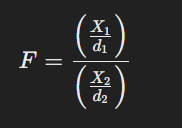

  follows an F-distribution with
d
1
  and
d
2
  degrees of freedom.
2. Degrees of Freedom (df):

   * The F-distribution is characterized by two types of degrees of freedom:
    * Numerator degrees of freedom (
d
1
 ): Associated with the variance estimate derived from the between-group variability.
    * Denominator degrees of freedom (
d
2
 ): Associated with the variance estimate derived from the within-group variability.
3. Shape of the F-Distribution: The F-distribution is positively skewed (right-skewed), especially for smaller degrees of freedom. As the degrees of freedom increase, the F-distribution becomes more symmetric and approaches the normal distribution.
4. Applications: ANOVA (Analysis of Variance): The F-distribution is used to determine whether there are any statistically significant differences between the means of three or more independent groups.
Comparing Two Variances: It is used to test the hypothesis that two populations have the same variance.
Regression Analysis: In regression, the F-test is used to determine whether the model explains a significant portion of the variance in the dependent variable.
5. Critical Values: In hypothesis testing, the F-distribution provides critical values that determine the cutoff point beyond which we reject the null hypothesis. These values depend on the chosen significance level (e.g., 0.05) and the degrees of freedom.

* Demonstrating F-Distribution in Python
   * Let’s create a Python example to demonstrate the F-distribution and its application in comparing variances using ANOVA.

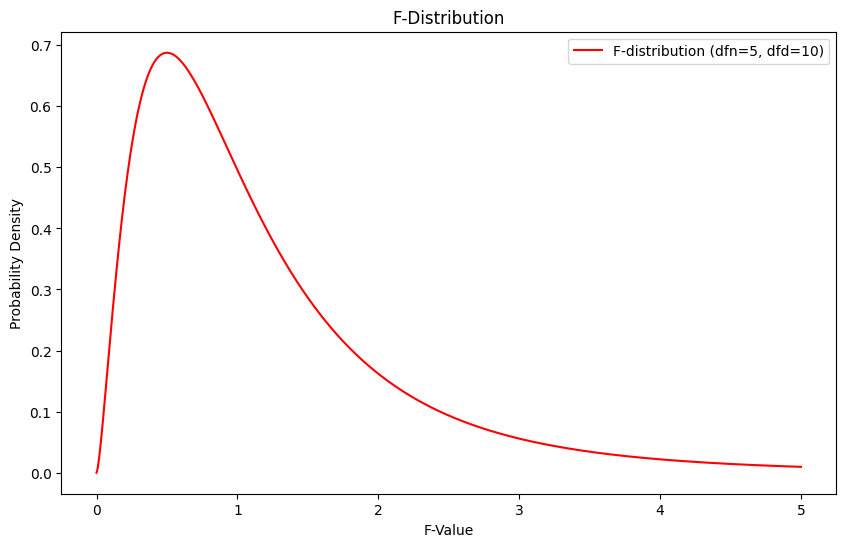

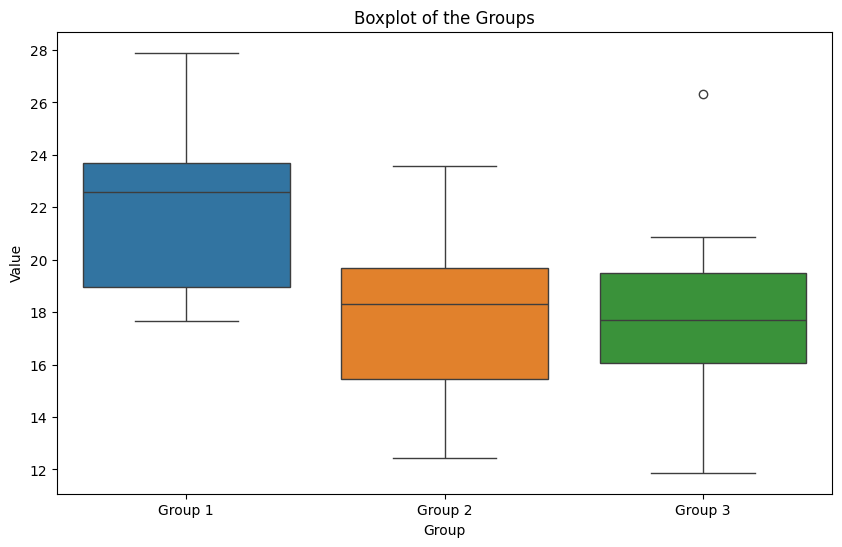

F-Statistic: 4.16
P-Value: 0.0266
Reject the null hypothesis: There is a significant difference between the group means.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Define degrees of freedom for F-distribution
dfn = 5  # Degrees of freedom for numerator (between groups)
dfd = 10  # Degrees of freedom for denominator (within groups)
x = np.linspace(0, 5, 1000)

# Plot the F-distribution
plt.figure(figsize=(10, 6))
f_dist = stats.f(dfn, dfd)
plt.plot(x, f_dist.pdf(x), 'r-', label=f'F-distribution (dfn={dfn}, dfd={dfd})')

plt.title('F-Distribution')
plt.xlabel('F-Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Simulate data for ANOVA
group1 = np.random.normal(loc=20, scale=5, size=10)
group2 = np.random.normal(loc=22, scale=5, size=10)
group3 = np.random.normal(loc=19, scale=5, size=10)

# Combine into a DataFrame for analysis
data = {
    'Group 1': group1,
    'Group 2': group2,
    'Group 3': group3
}

# Visualize the data distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot of the Groups')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f'F-Statistic: {f_statistic:.2f}')
print(f'P-Value: {p_value:.4f}')

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the group means.")

### Bayesian Statistics

* Bayesian Statistics is a statistical paradigm that interprets probability as a measure of belief or certainty rather than frequency. It is named after the Reverend Thomas Bayes, who developed Bayes' Theorem, a foundational concept in this approach. Bayesian statistics allows for the incorporation of prior knowledge or beliefs, which can be updated with new data to form a posterior belief.
* Key Concepts:
  1. Bayes' Theorem: Bayes' Theorem is the cornerstone of Bayesian statistics. It describes how to update the probabilities of hypotheses when given evidence. Mathematically, it is expressed as:

  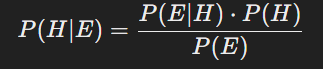

Where:
  * P(H∣E) is the posterior probability of the hypothesis
H given the evidence
E.
𝑃
(
𝐸
∣
𝐻
)
  * P(E∣H) is the likelihood of observing the evidence
E given that the hypothesis
H is true.
𝑃
(
𝐻
)
  * P(H) is the prior probability of the hypothesis
H, representing our belief before seeing the evidence.
(
𝐸
)
  * P(E) is the marginal likelihood or the probability of the evidence under all possible hypotheses.
2. Prior Distribution:
     * The prior distribution represents our beliefs about the parameters before observing any data. It reflects any existing knowledge or assumptions about the parameters.
3. Likelihood:

     * The likelihood function represents the probability of the observed data given specific parameter values. It measures how well the data supports different parameter values.
4. Posterior Distribution:

     * The posterior distribution is the updated belief about the parameters after observing the data. It is derived using Bayes' Theorem and combines the prior distribution and the likelihood.
5. Credible Interval:

     * A credible interval is the Bayesian equivalent of a confidence interval in frequentist statistics. It provides a range of values within which the parameter is likely to lie with a certain probability.
6. Conjugate Priors:
     * A conjugate prior is a prior distribution that, when combined with the likelihood, results in a posterior distribution that belongs to the same family as the prior. This simplifies the computation of the posterior distribution.
7. Bayesian Inference:
     * Bayesian inference is the process of using Bayes' Theorem to update the probability of a hypothesis as more evidence becomes available. It involves computing the posterior distribution and making decisions based on it.

* Bayesian Inference with Python
    * Let's use Python to perform a simple Bayesian inference example. We'll estimate the probability of a coin being biased toward heads.

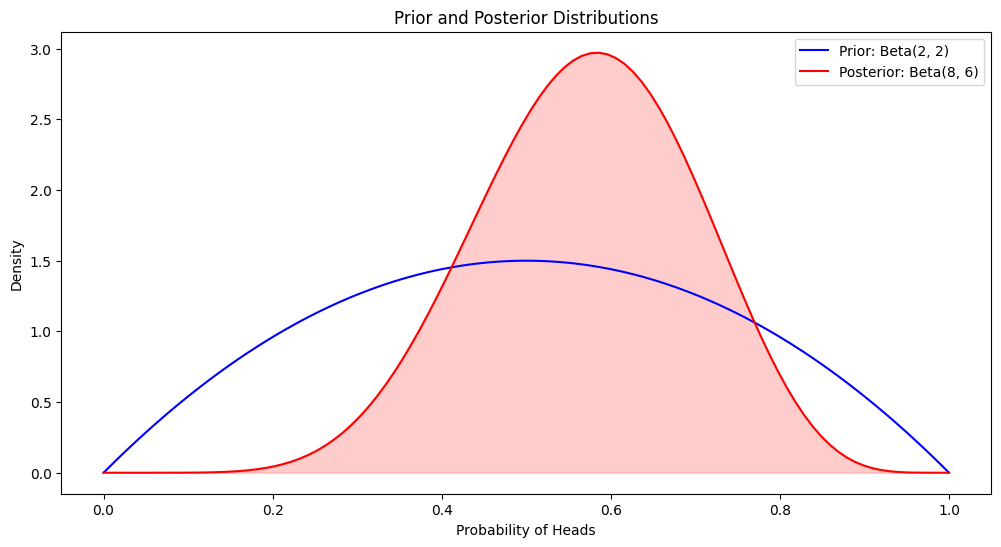

95% Credible Interval for the Probability of Heads: (0.31577760291406304, 0.807767558198712)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior parameters (Beta distribution)
alpha_prior = 2  # prior belief about heads (successes)
beta_prior = 2   # prior belief about tails (failures)

# Observed data (results of coin flips)
observed_heads = 6
observed_tails = 4

# Posterior parameters (Beta distribution)
alpha_post = alpha_prior + observed_heads
beta_post = beta_prior + observed_tails

# Range of probability values
p = np.linspace(0, 1, 100)

# Prior distribution
prior_dist = beta(alpha_prior, beta_prior).pdf(p)
# Posterior distribution
posterior_dist = beta(alpha_post, beta_post).pdf(p)

# Plotting the prior and posterior distributions
plt.figure(figsize=(12, 6))
plt.plot(p, prior_dist, label=f'Prior: Beta({alpha_prior}, {beta_prior})', color='blue')
plt.plot(p, posterior_dist, label=f'Posterior: Beta({alpha_post}, {beta_post})', color='red')
plt.fill_between(p, posterior_dist, alpha=0.2, color='red')
plt.title('Prior and Posterior Distributions')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.legend()
plt.show()

# Credible interval
credible_interval = beta(alpha_post, beta_post).interval(0.95)
print(f'95% Credible Interval for the Probability of Heads: {credible_interval}')

### Lognormal Distribution

* The log-normal distribution is characterized by the property that the logarithm of the variable follows a normal distribution.

* In simpler terms, if the original variable follows a log-normal distribution, taking the logarithm of that variable results in a normal distribution.

* This distribution is commonly observed in various fields, and it is particularly useful for handling right-skewed data.

* For example, if we consider the distribution of marks obtained by students, it might be right-skewed. However, if we take the logarithm of the marks, the resulting distribution tends to be more symmetric and follows a normal distribution. This property makes the log-normal distribution a valuable tool in data analysis, especially when dealing with variables that exhibit right-skewness.

* In data preprocessing, log transformation is often applied to variables with a log-normal distribution to make them closer to a normal distribution, facilitating statistical analyses and model assumptions.

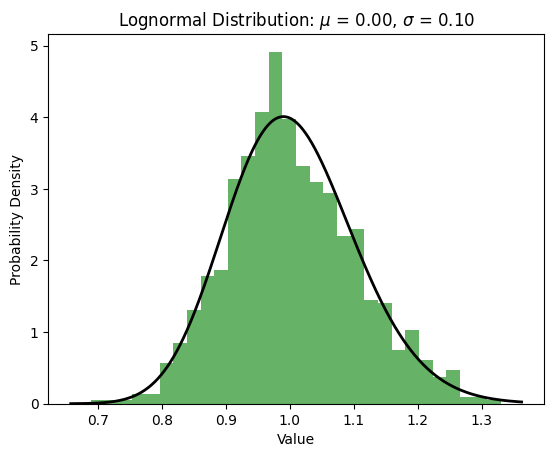

Mean: 1.0042241237589287
Variance: 0.010144223193687503


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the lognormal distribution
mu = 0  # mean of the log of the variable
sigma = 0.1  # standard deviation of the log of the variable

# Generate random data from a lognormal distribution
data = np.random.lognormal(mu, sigma, 1000)

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Generate the x values for plotting the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)

# Calculate the PDF of the lognormal distribution
pdf = stats.lognorm.pdf(x, s=sigma, scale=np.exp(mu))

# Plot the PDF
plt.plot(x, pdf, 'k', linewidth=2)
title = "Lognormal Distribution: $\mu$ = %.2f, $\sigma$ = %.2f" % (mu, sigma)
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

# Calculating the mean and variance
mean = np.mean(data)
variance = np.var(data)

print(f"Mean: {mean}")
print(f"Variance: {variance}")

The use case for identifying and transforming distributions, such as log-normal distributions in Predictive Analytics, is straightforward. In scenarios where we need to assess the distribution of a variable, and it exhibits characteristics of a log-normal distribution, taking the logarithm of that variable can help transform it into a normal distribution. This practice is particularly relevant in Predictive Analytics, where assumptions of normality are often desirable.

### Pareto Distribution

* The Pareto distribution is closely associated with the Pareto principle, often referred to as the 80-20 rule, where approximately 80% of effects come from 20% of causes. This principle is commonly observed in various domains, such as wealth distribution or sales, where a small percentage of elements contribute to the majority of the results.

![picture](https://drive.google.com/uc?export=view&id=1uBUuKgDjAc-QIY7YmMj3GDZTq9et3gZE)

In the context of the Pareto distribution, it is characterised by a power-law relationship, denoted as Y = k⋅X^(−α) where α is the shape parameter determining the distribution's behaviour. A higher value of α results in a steeper decrease.

![picture](https://drive.google.com/uc?export=view&id=12PGhlLXKHnzFsY__OS09mZ3A-iNGEWNx)

A use case example of the Pareto distribution is in natural phenomena like earthquakes or hurricanes, where a small percentage of events have high intensity or impact. For instance, in hurricanes, most occurrences might fall into lower intensity categories (1-2), while higher intensities (3-5) are rarer.

In [ ]:
# Generating an array 'x' with 100 points evenly spaced between 1 and 9
x = np.linspace(1, 9, 100)
# x

In [ ]:
# Creating a Pareto distribution object with shape parameter (b) 1, location parameter (loc) 2, and scale parameter (scale) 1.
pareto_dist = stats.pareto(b=1, loc=2, scale=1)

In [ ]:
# Computing the probability density function (PDF) of a Pareto distribution for the given array 'x'
d = pareto_dist.pdf(x)

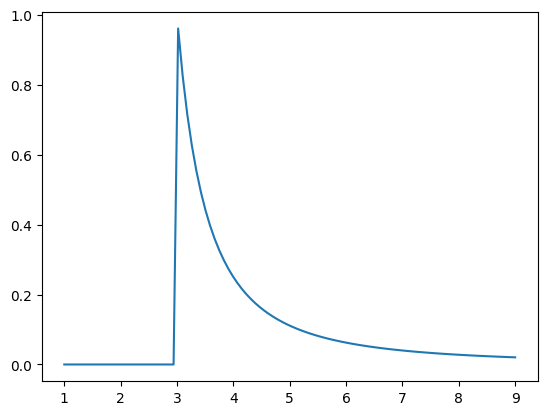

In [ ]:
# Plotting the probability density function (PDF) of a Pareto distribution using Matplotlib
plt.plot(x, d)

In [ ]:
# Calculating the cumulative distribution function (CDF) of a Pareto distribution at x = 4
pareto_dist.cdf(4)

0.5

In [ ]:
# Calculating the cumulative distribution function (CDF) of a Pareto distribution at x = 7
pareto_dist.cdf(7)

0.8

In [ ]:
# Calculating the probability of an event exceeding 8 in a Pareto distribution using the complement of CDF
1 - pareto_dist.cdf(8)

0.16666666666666663

In [ ]:
# Calculating the cumulative distribution function (CDF) value for Pareto distribution with shape parameter 1 at x = 2 and converting to percentage
stats.pareto(1).cdf(2) * 100

50.0